In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as sm
%matplotlib inline

MAPE: Mean Absolute Percentaje Error


In [137]:
def mape_score(y_test,y_pred):
    n = len(y_test)
    error = np.abs((y_test - y_pred)/np.mean(y_test))
    return np.sum(error)/n
    
def show_errors(y_test,y_pred):
    if type(y_test) is pd.DataFrame:
        y_test = y_test.values
    if type(y_pred) is pd.DataFrame:
        y_pred = y_pred.values
        
    n_metrics = 5
    metrics = np.zeros((n_metrics,13))
    for i in range(12):
        mae = sm.mean_absolute_error(y_test[:,i],y_pred[:,i])
        mse = sm.mean_squared_error(y_test[:,i],y_pred[:,i])
        medae = sm.median_absolute_error(y_test[:,i],y_pred[:,i])
        r2 = sm.r2_score(y_test[:,i],y_pred[:,i])
        mape = mape_score(y_test[:,i],y_pred[:,i])
        metrics[0,i] = mae
        metrics[1,i] = mse
        metrics[2,i] = medae
        metrics[3,i] = mape
        metrics[4,i] = r2
    for i in range(n_metrics):
        metrics[i,12] = np.mean(metrics[i,:12])
    
    metrics = pd.DataFrame(metrics)
    column_names = []
    for i in range(12):
        column_names.append("$t+{}$".format(i))
    column_names.append("$\overline{t+i}$")
    metrics.index = ["MAE","MSE", "MeAE", "MAPE" ,"$r^2$"]
    metrics.columns = column_names
    return metrics

In [131]:
y_pred = pd.read_csv("../../results/arima/12_1_12/y_approx.csv")
y_test  = pd.read_csv("../../results/arima/12_1_12/y_test.csv")
error = y_test - y_pred

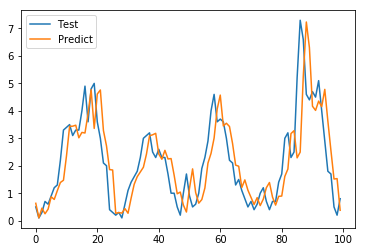

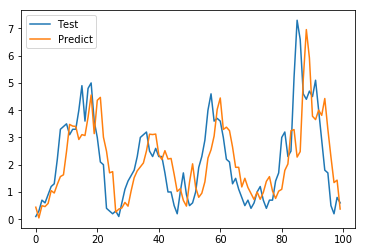

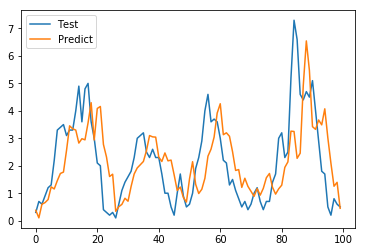

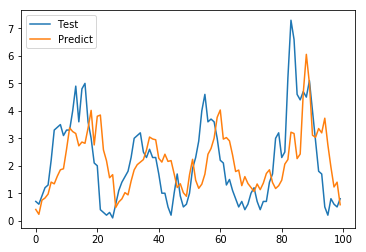

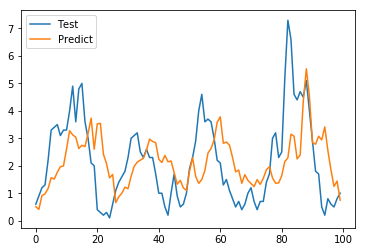

KeyboardInterrupt: 

In [132]:
for key in y_test.keys():
    plt.plot(y_test[key][:100], label="Test")
    plt.plot(y_pred[key][:100],label="Predict")
    plt.legend()
    plt.show()

In [ ]:
column_names = []
for i in range(1,13):
    if i < 10:
        column_names.append("$t+.{}$".format(i))
    else:
        column_names.append("$t+{}$".format(i))
error.columns = pd.CategoricalIndex(column_names, order=True)
error.hist(sharex=True,sharey=True,bins=20, figsize=(30,30))
plt.show()

In [138]:
metrics = show_errors(y_test,y_pred)
metrics

,$t+0$,$t+1$,$t+2$,$t+3$,$t+4$,$t+5$,$t+6$,$t+7$,$t+8$,$t+9$,$t+10$,$t+11$,$\overline{t+i}$
MAE,0.809174,0.990590,1.143910,1.256119,1.340277,1.388079,1.412545,1.421871,1.423501,1.416244,1.405684,1.394503,1.283542
MSE,1.280852,1.903371,2.418813,2.783193,3.052338,3.200994,3.295783,3.322586,3.311063,3.279970,3.228098,3.181551,2.854884
MeAE,0.576844,0.692282,0.818954,0.933947,1.035462,1.116815,1.162275,1.187928,1.231912,1.240960,1.237079,1.221319,1.037981
MAPE,0.352977,0.432098,0.498949,0.547791,0.584394,0.605271,0.615985,0.620144,0.620947,0.617942,0.613585,0.608886,0.559914
$r^2$,0.586443,0.385389,0.218818,0.100769,0.013530,-0.034355,-0.064799,-0.073106,-0.069057,-0.058695,-0.041895,-0.027011,0.078003


In [139]:
metrics.to_latex()

'\\begin{tabular}{lrrrrrrrrrrrrr}\n\\toprule\n{} &     \\$t+0\\$ &     \\$t+1\\$ &     \\$t+2\\$ &     \\$t+3\\$ &     \\$t+4\\$ &     \\$t+5\\$ &     \\$t+6\\$ &     \\$t+7\\$ &     \\$t+8\\$ &     \\$t+9\\$ &    \\$t+10\\$ &    \\$t+11\\$ &  \\$\\textbackslashoverline\\{t+i\\}\\$ \\\\\n\\midrule\nMAE   &  0.809174 &  0.990590 &  1.143910 &  1.256119 &  1.340277 &  1.388079 &  1.412545 &  1.421871 &  1.423501 &  1.416244 &  1.405684 &  1.394503 &          1.283542 \\\\\nMSE   &  1.280852 &  1.903371 &  2.418813 &  2.783193 &  3.052338 &  3.200994 &  3.295783 &  3.322586 &  3.311063 &  3.279970 &  3.228098 &  3.181551 &          2.854884 \\\\\nMeAE  &  0.576844 &  0.692282 &  0.818954 &  0.933947 &  1.035462 &  1.116815 &  1.162275 &  1.187928 &  1.231912 &  1.240960 &  1.237079 &  1.221319 &          1.037981 \\\\\nMAPE  &  0.352977 &  0.432098 &  0.498949 &  0.547791 &  0.584394 &  0.605271 &  0.615985 &  0.620144 &  0.620947 &  0.617942 &  0.613585 &  0.608886 &          0.559914 \\